## Rishabh Sareen

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
### Adult Dataset is the census Income dataset from the 1994 Census Database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
### Loading directly from url this time.
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
           
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace = True)
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print("Age Statistics")
print(data['age'].describe())
print("Median Age: ", data['age'].median())


Age Statistics
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Median Age:  37.0


In [79]:
# Final weight Statistics
print("Final weight Statistics")
print(data['fnlwgt'].describe())
print("Median Final Weight: ", data['fnlwgt'].median())

Final weight Statistics
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
Median Final Weight:  178356.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

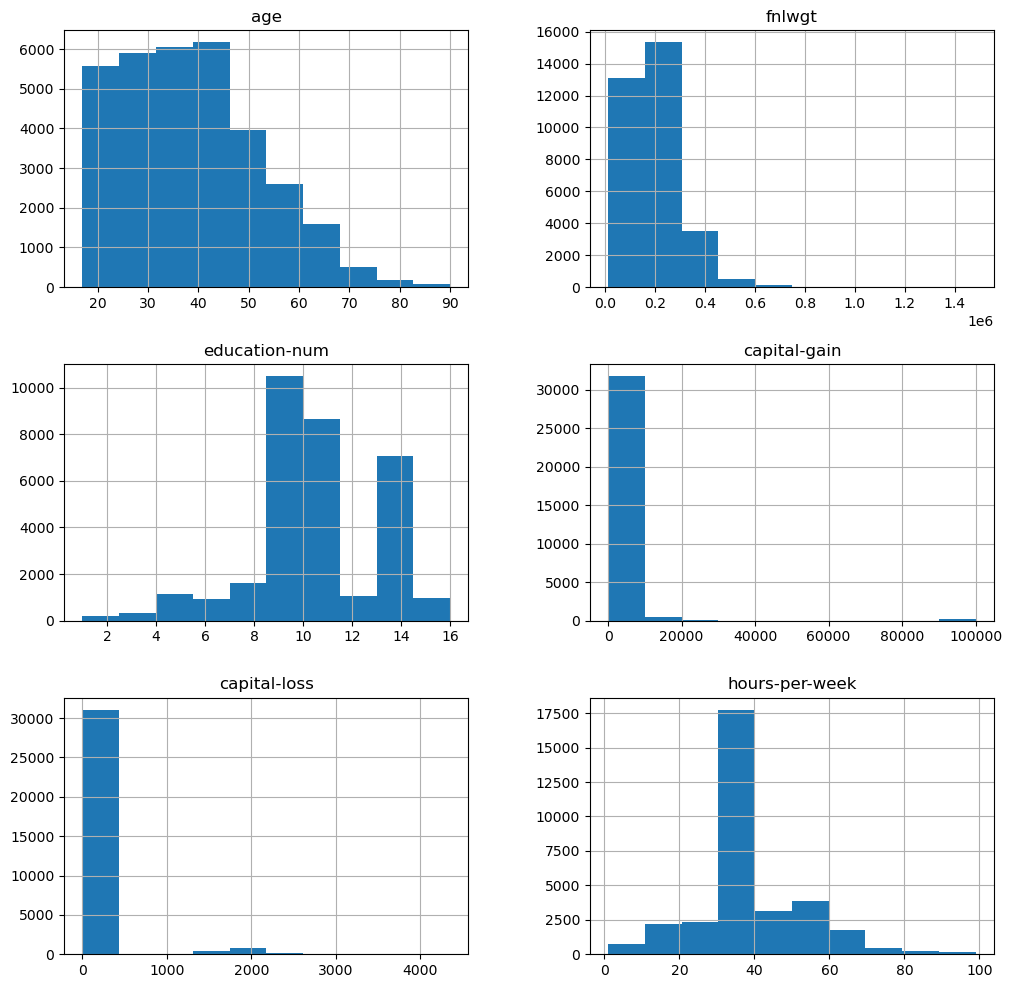

In [6]:
numerical_attributes = data.select_dtypes(include=['int'])

numerical_attributes.hist(figsize=(12,12))

### Insights
The visualization of the numerical attributes give us a few interesting insights on the distribution of values.

1. Most of the individuals have an age < 50 while the maximum age is around 90.
2. In general, people do not have investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000. 
3. On average, most of the people have studied till education number 9 or 10 in the areas where the census was taken. 
4. Most of the people work around 40 hrs per week. However there are a few who don't work and a few who work for almost 100 hours a week.

For categorical attributes, we can view the count plot to see their frequency distributions.

<AxesSubplot:xlabel='work-class', ylabel='count'>

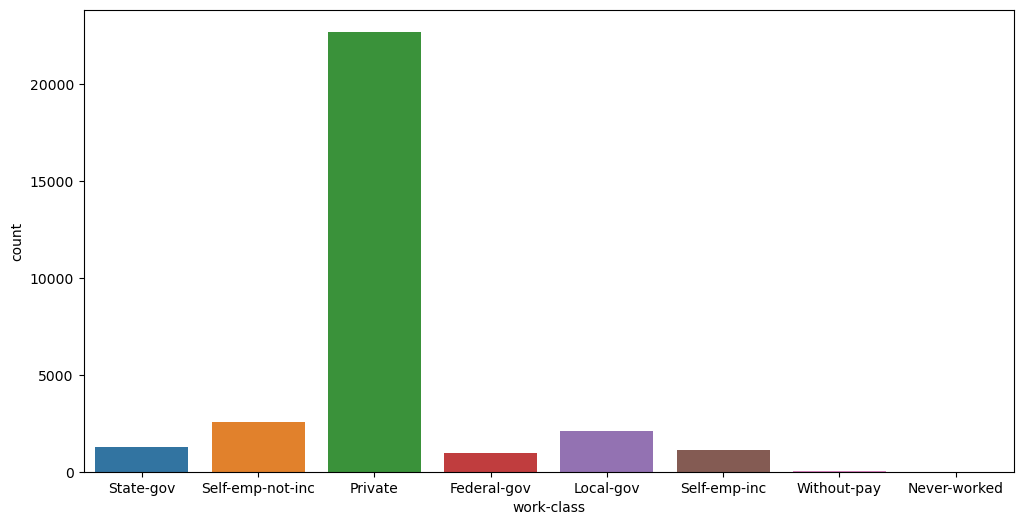

In [7]:
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])

# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

### We can see that most of the people work in private sectors, and the rest are evenly distributed among state-gov, federal-gov, local-gov, self-emp-inc and self-emp-not-inc.

<AxesSubplot:xlabel='education', ylabel='count'>

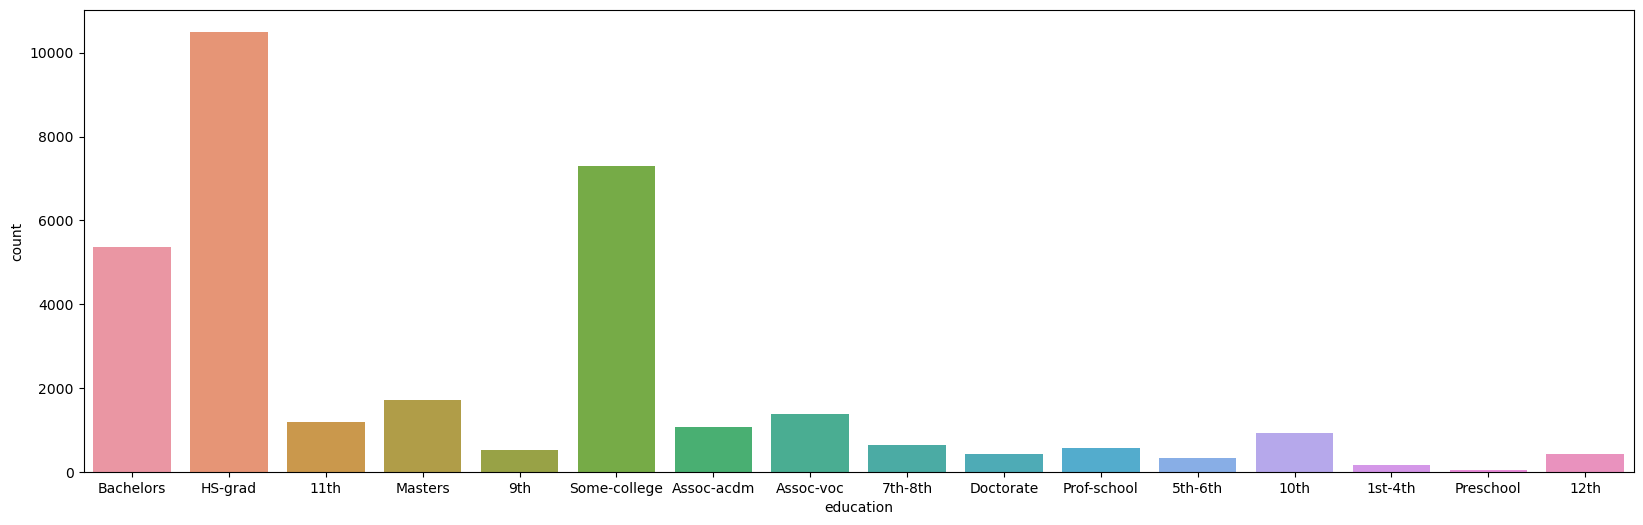

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(data = categorical_attributes, x = "education")

### Most of the people are high-school grads or have studied in some college. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model, and ignore the other.

<AxesSubplot:xlabel='marital-status', ylabel='count'>

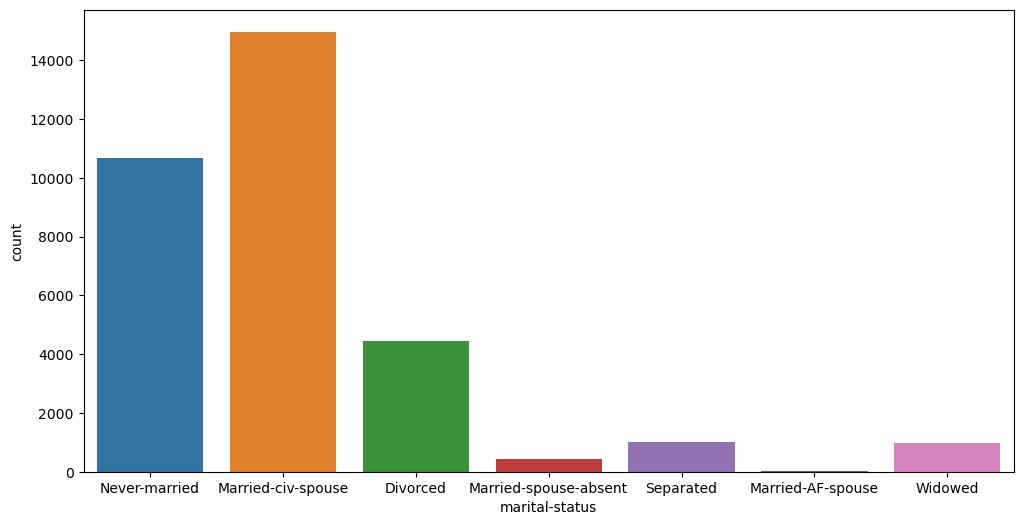

In [9]:
# Marital-Status Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "marital-status")

### Most of the people are either married civilians or are never married. 

In [80]:
#Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
print("Missing value count occupation: ", data['occupation'].isnull().sum())
print("Missing value count work-class: ", data['work-class'].isnull().sum())
print("Missing value count native-country: ", data['native-country'].isnull().sum())

Missing value count occupation:  1843
Missing value count work-class:  1836
Missing value count native-country:  583


### Insights
From the above table, we can see that there are 32561 entries in the dataframe. Only 3 attributes, namely work-class, occupation, native-country have some missing/null values as there is no data regarding them or people refused to give that specific information.

There are a lot of ways in which we can handle missing data. As all the three are categorical data, we would be talking only about handling categorical data here.
1. Drop these rows, so that we don't have any missing values in our data.
2. Choose the median of values once we have transformed categorical values into corresponding numerical representations, as median is not affected by the range/spread of data unlike mean.
3. We could also use a classifier with non-missing values to predict the missing values, and then use them to build our final model.
3. There are certain classifiers like XGBoost which automatically handle missing data, but we won't assume that here.

We could drop these values as there are not in a huge number here(~10% of the data). However, if our dataset is really small, we could consider the option 2, like incase of native-country, we could consider USA as the native country as more than 90% of the people in the dataset are from USA.  

We will also drop any duplicates present in the data, as these could lead to overfitting.

### Pairplot
We will plot pair plot to explore the pairwise relationship among attributes. Also, since we have already we have already seen histograms, we will use kde(Kernel density estimation) plot which shows the shape of the distribution as the diagonal plots.

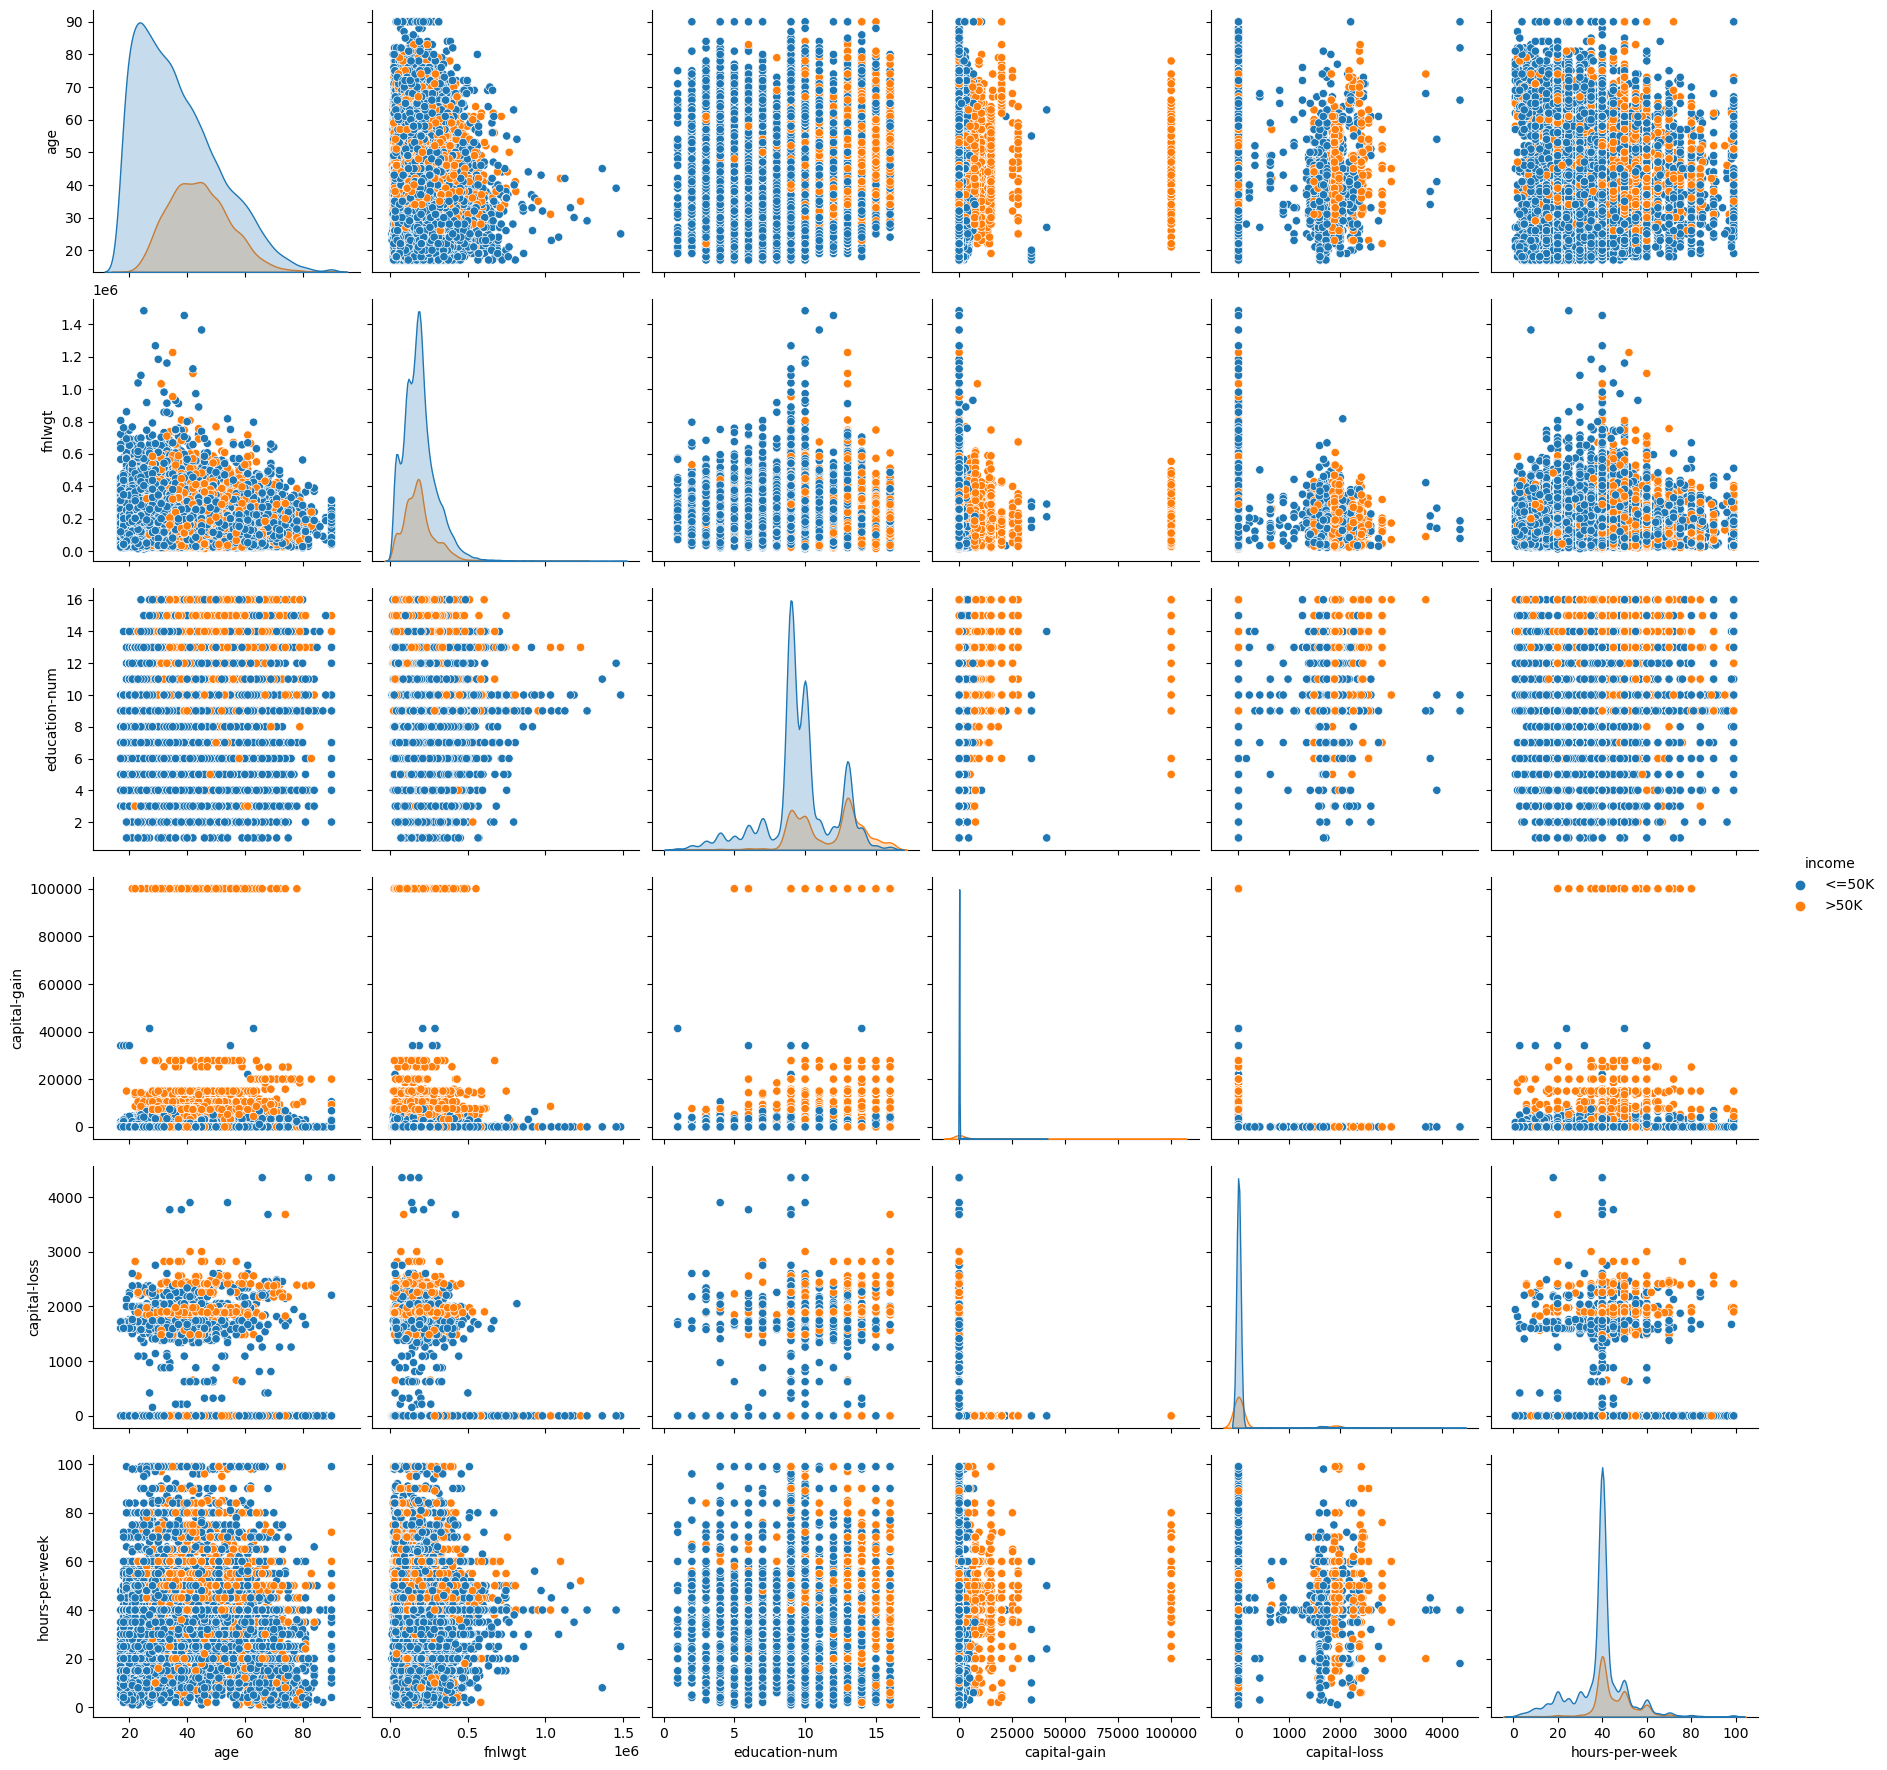

In [12]:
# Data Relationship
sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

Text(0.5, 1.05, 'Pearson Correlation of Features')

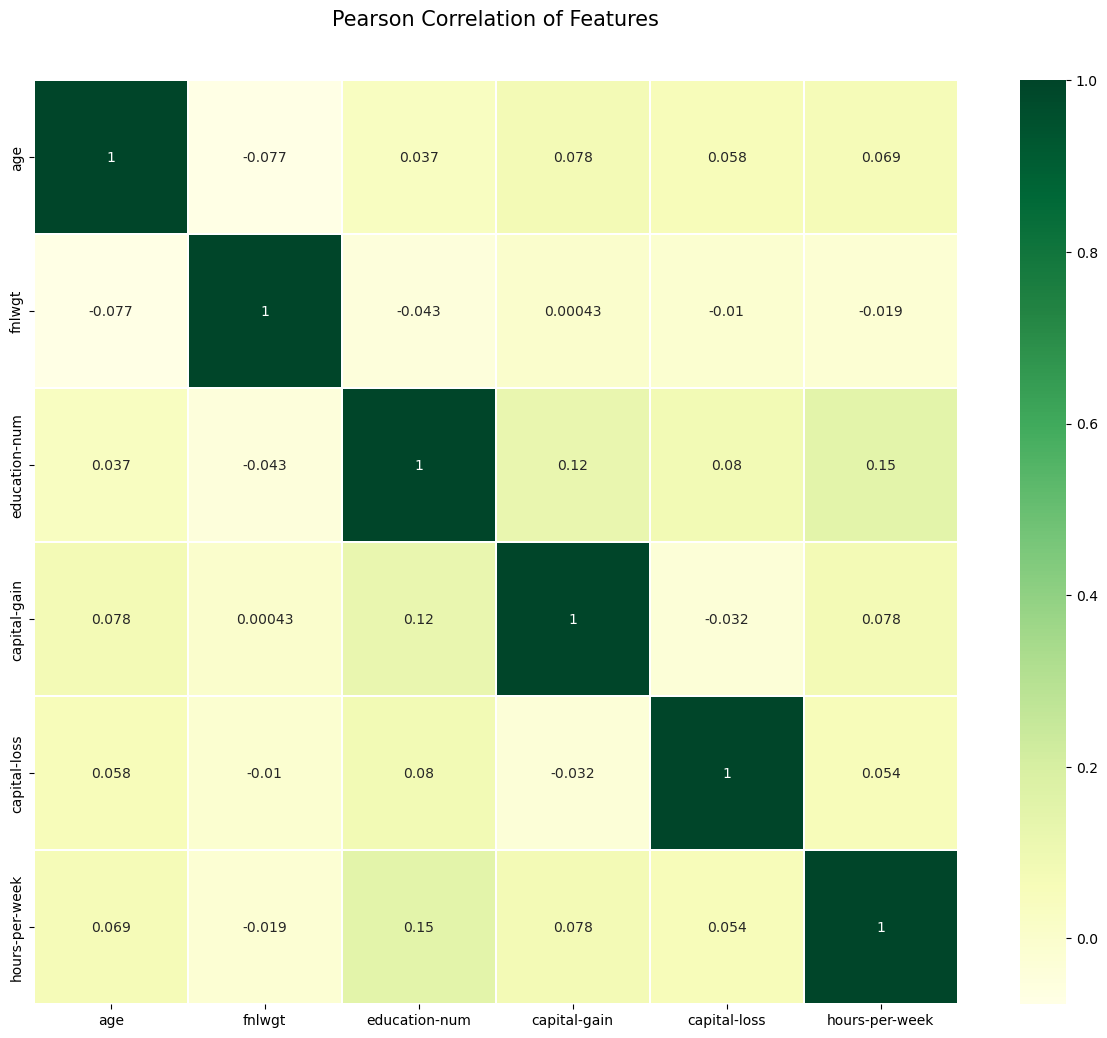

In [13]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

### Insights

There isn't a great correlation between the numerical features.

1. The fnlwgt feature looks useless.
2. There is some correlation between age, hours per week and education-num according to both pair plot and correlation heatmap.
3. Capital gain and Capital loss don't anticorrelate a lot, which says people can invest only if they have money.

Let's look at a few relationships among categorical attributes.

<AxesSubplot:xlabel='work-class', ylabel='age'>

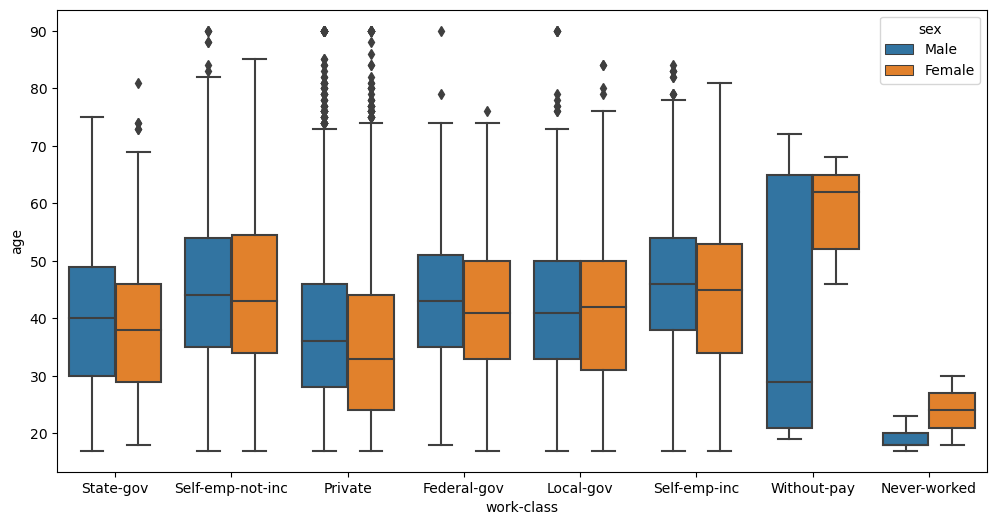

In [14]:
# Box plot between work-class and age for different sex

plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

### Insights
The cross tabulation values show that more number of men are self employed rather than women. The box plot gives a few interesting observations:
1. People who have never worked have a very young age. Women have a slightly higher median age than men for this working-class.
2. Men who work without pay have a median age of around 20-30, whereas women who work without pay have a median age of around 60-65.
3. Most of the working class have a median age of around 40-50.

## Opinion on Adult Dataset

1. why did you pick this dataset?

Most of the times a data scientist deals with demographics or predicting population dynamics. So, I wnated to work on Census data from some year and I got that for 1994 on UCI repository. 

2. are there any interesting insights you gained from performing EDA on this dataset? (use all/most of the Seaborn tools we discussed this week)

There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.
There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

3. are there any actionable insights you can get from this data? (For example, if you were a CEO and looking at the mpg dataset, what might you conclude?)

This dataset also contains information about more males than females. This may be because females did not prefer to take the survey. 

Also, this dataset is biased towards people making <=50K USD.


Finally, open a new markdown and discuss which of these three datasets would make the best project dataset. Were some of the datasets disappointing? Was one much richer with possibilities? The reason you are asked to pick three is that some datasets is that you need to be able to assess which datasets are more or less interesting for your projects. 
